In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d_img=cv2.imread("ultimate_test/2_a.jpg")
f_img=cv2.imread("ultimate_test/2_b.jpg")

d_rgb=cv2.cvtColor(d_img, cv2.COLOR_BGR2RGB)
f_rgb=cv2.cvtColor(f_img, cv2.COLOR_BGR2RGB)

d_gray=cv2.cvtColor(d_rgb, cv2.COLOR_RGB2GRAY)
f_gray=cv2.cvtColor(f_rgb, cv2.COLOR_RGB2GRAY)

d_r,d_g,d_b=cv2.split(d_rgb)
f_r,f_g,f_b=cv2.split(f_rgb)

In [3]:
def bilateral_filter(a_image,f_image,d,sigma_color,sigma_space):
    a_image = a_image.astype(np.float32)
    f_image = f_image.astype(np.float32)
    height, width = a_image.shape[:2]
    filtered_image = np.zeros_like(a_image, dtype=np.float32)
    k_range=int((d-1)/2)
    

    for y in range(height):
        for x in range(width):
            pixel_value = 0.0
            normalization = 0.0

            for i in range(max(0, y - k_range), min(height, y+k_range+1)):
                for j in range(max(0, x -k_range), min(width, x + k_range+1)):
                    spatial_diff = np.sqrt((i - y)**2 + (j - x)**2) 
                    intensity_diff = np.abs(f_image[i, j] - f_image[y, x])

                    weight_spatial = np.exp(-0.5 * (spatial_diff / sigma_space)**2)
                    weight_intensity = np.exp(-0.5 * (intensity_diff / sigma_color)**2)

                    weight = weight_spatial * weight_intensity
                    normalization += weight
                    pixel_value += weight * a_image[i, j]

            filtered_image[y, x] = pixel_value / normalization

    return filtered_image.astype(np.uint8)


In [4]:
ambient_r=bilateral_filter(d_r,f_r,5,0.27,30)
ambient_g=bilateral_filter(d_g,f_g,5,0.27,30)
ambient_b=bilateral_filter(d_b,f_b,5,0.27,30)

In [5]:
ambient_nr=cv2.merge([ambient_r,ambient_g,ambient_b])

In [6]:
f_base_r=bilateral_filter(f_r,f_r,5,12.75,24)
f_base_g=bilateral_filter(f_g,f_g,5,12.75,24)
f_base_b=bilateral_filter(f_b,f_b,5,12.75,24)

In [7]:
e=0.02
f_detail_r=(f_r+e)/(f_base_r+e)
f_detail_g=(f_g+e)/(f_base_g+e)
f_detail_b=(f_b+e)/(f_base_b+e)

f_detail=cv2.merge([f_detail_r,f_detail_g,f_detail_b])

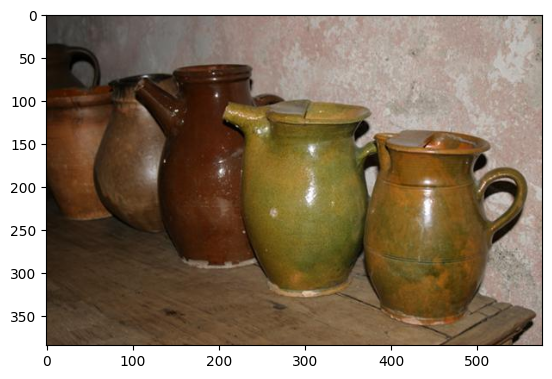

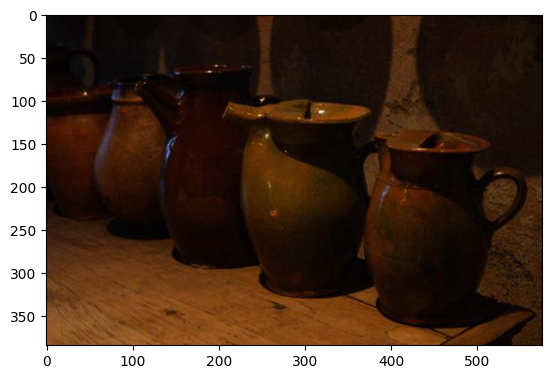

In [8]:
plt.imshow(f_rgb)
plt.show()

plt.imshow(d_rgb)
plt.show()

In [100]:
final=ambient_nr*f_detail

final_min = np.percentile(final, 0)  # Adjust percentile as needed
final_max = np.percentile(final, 99.99)  # Adjust percentile as needed

final_stretched = 255 * (final - final_min) / (final_max - final_min)
final_stretched = (final_stretched.astype(np.uint8))

gamma = 0.9 # Adjust gamma value as needed
final_gamma_corrected = ((final_stretched / 255) ** gamma) * 255
final_gamma_corrected = final_gamma_corrected.astype(np.uint8)


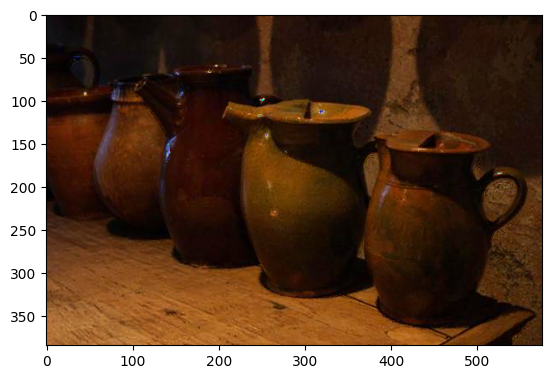

In [101]:
import cv2
import numpy as np

# Assuming 'final' is your input image

# Convert the image to 8-bit unsigned integer format
final_uint8 = cv2.convertScaleAbs(final_stretched)

# Convert the image to HSV
hsv = cv2.cvtColor(final_uint8, cv2.COLOR_RGB2HSV)

# Extract the V channel
v_channel = hsv[:,:,2]

# Apply histogram equalization to the V channel
v_channel_equalized = cv2.equalizeHist(v_channel)

# Update the V channel in the original image
hsv[:,:,2] = v_channel_equalized

# Convert the image back to RGB
equalized_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# Display the original and equalized images
plt.imshow(final_gamma_corrected)
plt.show()


In [97]:
filtered=cv2.medianBlur(equalized_image,5)
# filter_b=bilateral_filter(equalized_image,equalized_image,5,)

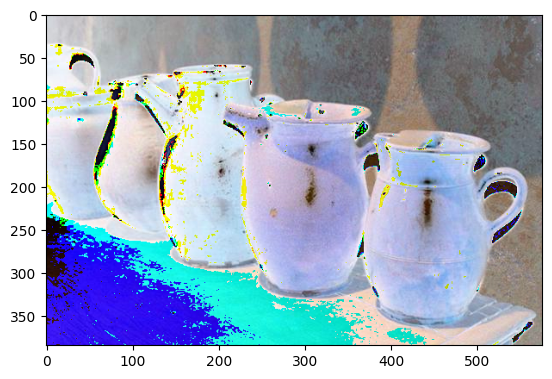

In [13]:
plt.imshow(d_rgb-f_rgb)
plt.show()